# # Load the data from the CSV file
# Replace 'wireshark_data.csv' with the name of your file

localhost_1000q_groq_v3_qwen

wifi_1000q_groq_v3_qwen

localhost_1000q_deepseek

wifi_1000q_llama2

localhost_1000q_llama2

localhost_1000q_openai_v2

wifi_1000q_openai_v2

wifi_1000q_llama

localhost_1000q_llama

wifi_1000q_llama

wifi_1000q_mistral

localhost_1000q_mistral

wifi_1000q_claude

localhost_1000q_claude



localhost_1000q_deepseek_R1


wifi_1000q_deepseek_R1

In [ ]:
import pandas as pd

# Load the data
file_path = '/langchain/'
name = 'wireshark_data'
format = '.csv'
full_path = f"{file_path}{name}{format}"
df = pd.read_csv(full_path)
# Ensure necessary columns are present
required_columns = ['Stream index', 'Source Port', 'Destination Port', 'Length']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the dataset.")
    
first_sources = df.groupby('Stream index')['Source Port'].first().reset_index()
first_sources.rename(columns={'Source Port': 'Initiator Port'}, inplace=True)
df = df.merge(first_sources, on='Stream index')

# Label packets as request or response
df['Direction'] = df['Source Port'] == df['Initiator Port']
df['Direction'] = df['Direction'].map({True: 'request', False: 'response'})

In [11]:
df

,No.,Time,Source,Destination,Source Port,Destination Port,Protocol,Length,Stream index,Info,Initiator Port,Direction
0,159,28.298512,127.0.0.1,127.0.0.1,60556,3836,TCP,56,79,60556 > 3836 [SYN] Seq=0 Win=65535 Len=0 MSS...,60556,request
1,160,28.298619,127.0.0.1,127.0.0.1,3836,60556,TCP,56,79,"3836 > 60556 [SYN, ACK] Seq=0 Ack=1 Win=6553...",60556,response
2,161,28.298679,127.0.0.1,127.0.0.1,60556,3836,TCP,44,79,60556 > 3836 [ACK] Seq=1 Ack=1 Win=65280 Len=0,60556,request
3,162,28.298796,127.0.0.1,127.0.0.1,60556,3836,HTTP,601,79,GET /respond?query=Janet%E2%80%99s%20ducks%20l...,60556,request
4,163,28.298830,127.0.0.1,127.0.0.1,3836,60556,TCP,44,79,3836 > 60556 [ACK] Seq=1 Ack=558 Win=64768 L...,60556,response
...,...,...,...,...,...,...,...,...,...,...,...,...
12995,286797,48422.953523,127.0.0.1,127.0.0.1,61939,3836,TCP,44,135590,61939 > 3836 [ACK] Seq=437 Ack=748 Win=64768...,61939,request
12996,286798,48422.954102,127.0.0.1,127.0.0.1,61939,3836,TCP,44,135590,"61939 > 3836 [FIN, ACK] Seq=437 Ack=748 Win=...",61939,request
12997,286799,48422.954150,127.0.0.1,127.0.0.1,3836,61939,TCP,44,135590,3836 > 61939 [ACK] Seq=748 Ack=438 Win=65024...,61939,response
12998,286800,48422.956955,127.0.0.1,127.0.0.1,3836,61939,TCP,44,135590,"3836 > 61939 [FIN, ACK] Seq=748 Ack=438 Win=...",61939,response


## Group by stream and compute total size

In [ ]:
stream_sizes = df.groupby('Stream index')['Length'].sum().reset_index()
stream_sizes_request_response = df.groupby(['Stream index', 'Source Port'])['Length'].sum().reset_index()

stream_sizes.rename(columns={'Length': 'stream_size'}, inplace=True)
stream_sizes_request_response.rename(columns={'Length': 'stream_size'}, inplace=True)

stream_sizes_sorted = stream_sizes.sort_values(by='stream_size', ascending=False).reset_index(drop=True)

## Sort by size

In [ ]:
stream_sizes_sorted = stream_sizes.sort_values(by='stream_size', ascending=False).reset_index(drop=True)

In [16]:
stream_sizes

,Stream index,stream_size
0,79,1648
1,171,1355
2,262,1677
3,466,1479
4,545,2073
...,...,...
995,134878,1495
996,134964,1755
997,135131,1872
998,135492,1793


Request and Response separately 

In [17]:
stream_sizes_request_response

,Stream index,Source Port,stream_size
0,79,3836,771
1,79,60556,877
2,171,3836,725
3,171,60582,630
4,262,3836,931
...,...,...,...
1995,135131,61853,986
1996,135492,3836,849
1997,135492,61921,944
1998,135590,3836,1023


In [18]:
indexes_to_remove = stream_sizes_sorted[1000:len(stream_sizes_sorted)]['Stream index']

## Save data to the file

In [19]:
stream_sizes_request_response = stream_sizes_request_response[~stream_sizes_request_response['Stream index'].isin(indexes_to_remove)] 
stream_sizes_request_response.to_csv(f"statistics_stream_sizes_request_response_{name}.csv", index=False)
print(f"\nStream statistics saved to 'statistics_stream_sizes_request_response_{name}.csv'.")
stream_sizes_request_response #filtered


Stream statistics saved to 'statistics_stream_sizes_request_response_localhost_1000q_deepseek_R1.csv'.


,Stream index,Source Port,stream_size
0,79,3836,771
1,79,60556,877
2,171,3836,725
3,171,60582,630
4,262,3836,931
...,...,...,...
1995,135131,61853,986
1996,135492,3836,849
1997,135492,61921,944
1998,135590,3836,1023


Request + Response

In [20]:
stream_sizes_sorted

,Stream index,stream_size
0,20629,2660
1,22677,2660
2,57044,2628
3,2273,2614
4,129440,2575
...,...,...
995,45785,1260
996,56374,1260
997,73180,1238
998,57558,1212


In [21]:
stream_sizes_sorted=stream_sizes_sorted[0:1000]
# Save the result to a CSV
stream_sizes_sorted.to_csv(f"statistics_stream_sizes_sorted_{name}.csv", index=False)
print(f"\nStream statistics saved to 'statistics_stream_sizes_sorted_{name}.csv'.")
stream_sizes_sorted


Stream statistics saved to 'statistics_stream_sizes_sorted_localhost_1000q_deepseek_R1.csv'.


,Stream index,stream_size
0,20629,2660
1,22677,2660
2,57044,2628
3,2273,2614
4,129440,2575
...,...,...
995,45785,1260
996,56374,1260
997,73180,1238
998,57558,1212


In [22]:
# Compute statistics
mean_stream_size = stream_sizes_sorted['stream_size'].mean()
std_stream_size = stream_sizes_sorted['stream_size'].std()
q1_stream_size = stream_sizes_sorted['stream_size'].quantile(0.25)
median_stream_size = stream_sizes_sorted['stream_size'].median()
q3_stream_size = stream_sizes_sorted['stream_size'].quantile(0.75)
min_stream_size = stream_sizes_sorted['stream_size'].min()
max_stream_size = stream_sizes_sorted['stream_size'].max()

# Print results
print(f"Min: {min_stream_size}")
print(f"Q1: {q1_stream_size}")
print(f"Median: {median_stream_size}")
print(f"Mean: {mean_stream_size}")
print(f"Q3: {q3_stream_size}")
print(f"Max: {max_stream_size}")
print(f"Standard Deviation: {std_stream_size}")

Min: 1184
Q1: 1536.0
Median: 1664.0
Mean: 1702.518
Q3: 1828.25
Max: 2660
Standard Deviation: 235.22878705264424


# Plot Boxplot of stream sizes for all LLMs

In [23]:
# Shared color palette
model_palette = {
    "Qwen-2.5-32b": "#66c2a5",
    "Deepseek": "#fc8d62",  # Only appears in localhost plot
    "LLaMA3.2-11b-vision": "#8da0cb",
    "LLaMA3.1-70b": "#e78ac3",
    "MistralAI": "#a6d854",
    "Openai gpt-3.5-turbo": "#ffd92f",
    "Claude-3-sonnet": "#e5c494"
}

C:\Users\otomy\AppData\Local\Temp\ipykernel_27512\3273503171.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


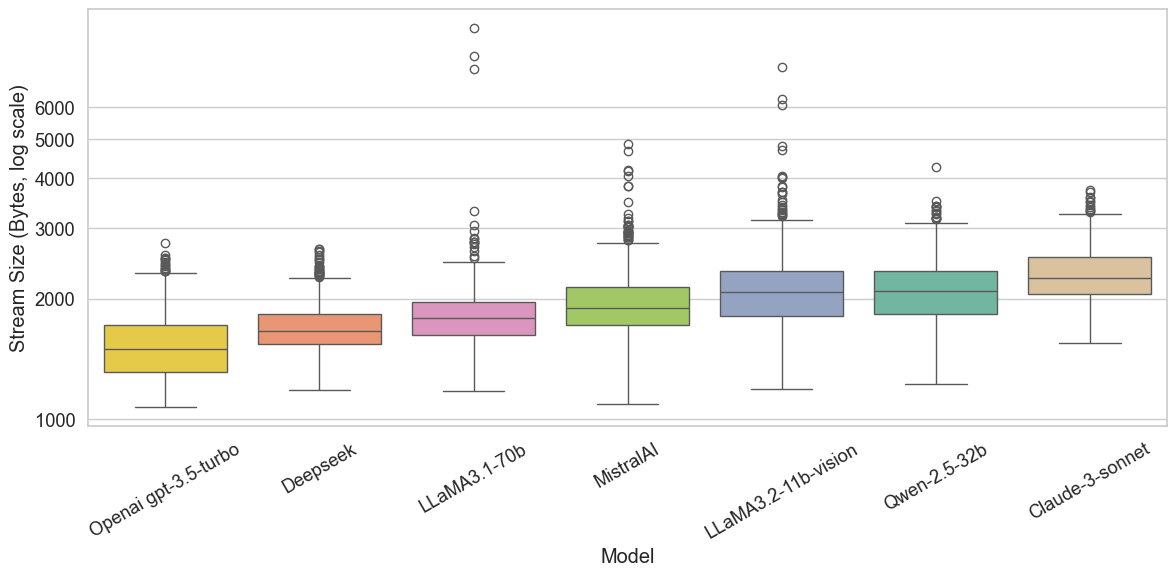

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style
sns.set(style="whitegrid", font_scale=1.2)

# Corrected file paths for different LLMs
file_paths = {
    "Qwen-2.5-32b": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_groq_v3_qwen.csv",
    "Deepseek": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_deepseek_R1.csv",
    "LLaMA3.2-11b-vision": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_llama2.csv",
    "LLaMA3.1-70b": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_llama31_v2.csv",
    "MistralAI": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_mistral.csv",
    "Openai gpt-3.5-turbo": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_openai_v2.csv",
    "Claude-3-sonnet": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_claude.csv"
}


# Container for all data
all_data = []

# Load and process each file
for model_name, path in file_paths.items():
    if not os.path.exists(path):
        print(f"File not found: {path}")
        continue
    
    df = pd.read_csv(path)
    df['Model'] = model_name
    all_data.append(df[['Model', 'stream_size']])

# Concatenate all data into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)


# Calculate median stream size per model
localhost_medians = combined_df.groupby("Model")["stream_size"].median()
localhost_sorted_models = localhost_medians.sort_values().index.tolist()

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=combined_df,
    x="Model",
    y="stream_size",
    palette=model_palette,
    order=localhost_sorted_models,
    showfliers=True
)
plt.yscale("log")
yticks = [1000, 2000, 3000, 4000, 5000, 6000]
ax.set_yticks(yticks)
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
#plt.title("Localhost Traffic per LLM (Log Scale)", fontsize=16)
plt.ylabel("Stream Size (Bytes, log scale)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()





C:\Users\otomy\AppData\Local\Temp\ipykernel_27512\1839430763.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


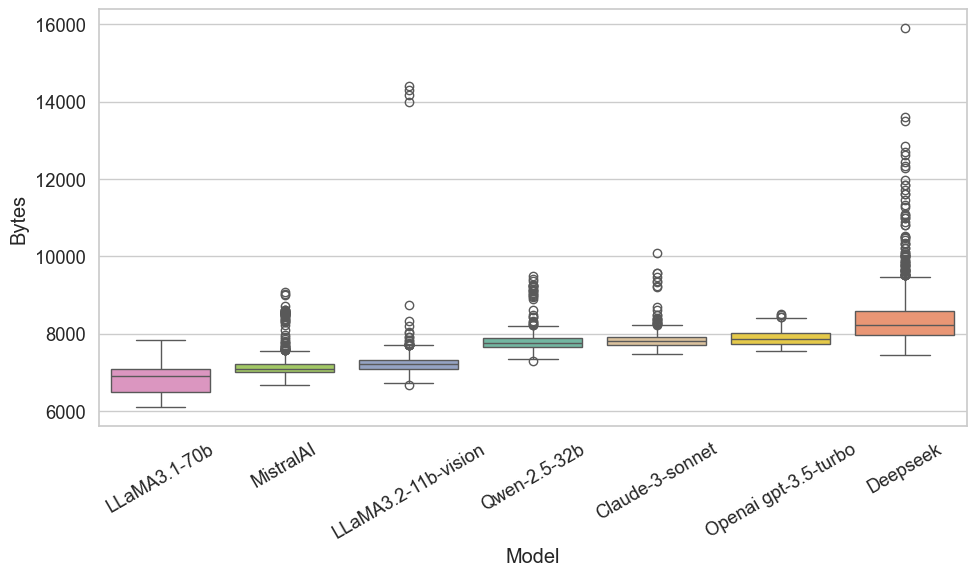

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style
sns.set(style="whitegrid", font_scale=1.2)


# Corrected file paths for different LLMs
file_paths = {
    "Qwen-2.5-32b": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_groq_v3_qwen.csv",
    "LLaMA3.2-11b-vision": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_llama2.csv",
    "LLaMA3.1-70b": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_llama31_v2.csv",
    "MistralAI": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_mistral.csv",
    "Openai gpt-3.5-turbo": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_openai_v2.csv",
    "Claude-3-sonnet": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_claude.csv",
    "Deepseek": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_deepseek_R1.csv"
}


# Container for all data
all_data = []

# Load and process each file
for model_name, path in file_paths.items():
    if not os.path.exists(path):
        print(f"File not found: {path}")
        continue
    
    df = pd.read_csv(path)
    df['Model'] = model_name
    all_data.append(df[['Model', 'stream_size']])

# Concatenate all data into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)



# Calculate median stream size per model
wifi_medians = combined_df.groupby("Model")["stream_size"].median()
wifi_sorted_models = wifi_medians.sort_values().index.tolist()

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=combined_df,
    x="Model",
    y="stream_size",
    palette=model_palette,
    order=wifi_sorted_models,
    showfliers=True
)
#plt.title("WiFi Traffic per LLM (Bytes Exchanged per Query)", fontsize=15)
plt.ylabel("Bytes")
plt.xticks(rotation=30)
plt.tight_layout()

# Save to SVG
plt.savefig("wifi_traffic_plot.svg", format='svg')
plt.show()



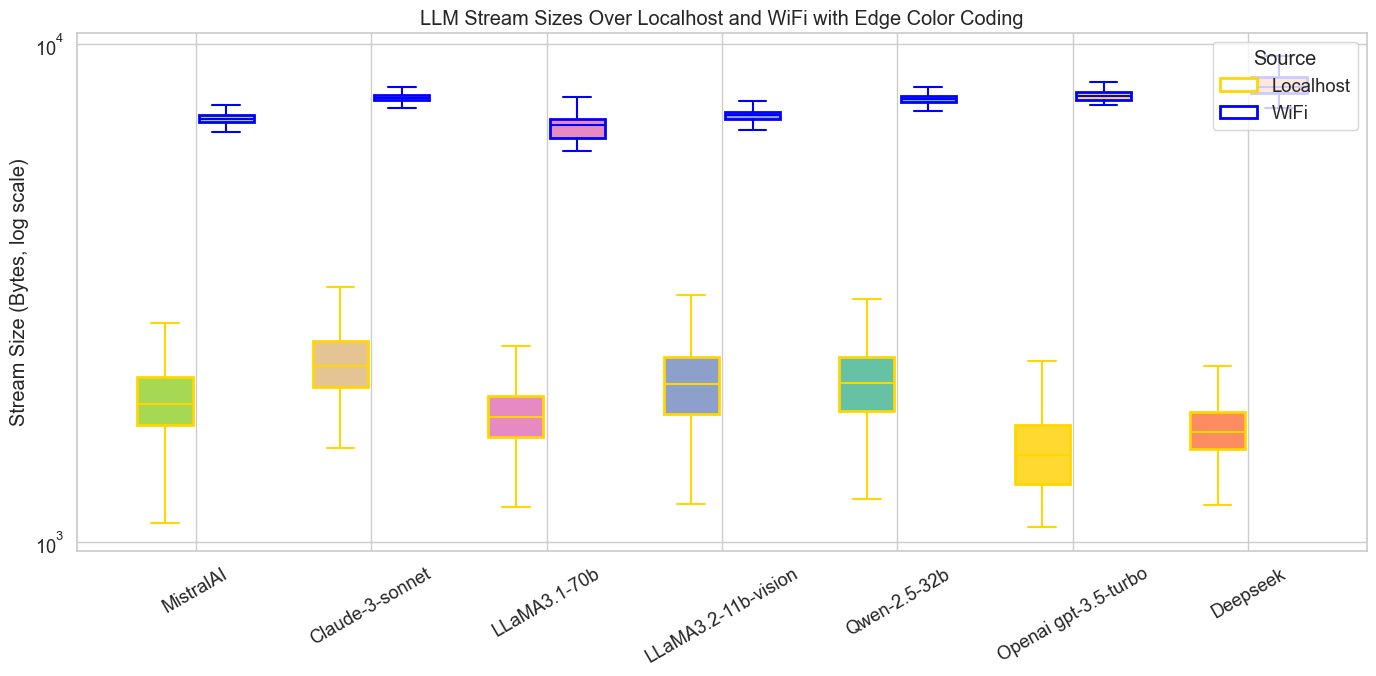

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.patches as mpatches  # 

# Style
sns.set(style="whitegrid", font_scale=1.2)

# Plot order and color palette
desired_order = [
    "MistralAI",
    "Claude-3-sonnet",
    "LLaMA3.1-70b",
    "LLaMA3.2-11b-vision",
    "Qwen-2.5-32b",
    "Openai gpt-3.5-turbo",
    "Deepseek"
]

model_palette = {
    "Qwen-2.5-32b": "#66c2a5",
    "Deepseek": "#fc8d62",
    "LLaMA3.2-11b-vision": "#8da0cb",
    "LLaMA3.1-70b": "#e78ac3",
    "MistralAI": "#a6d854",
    "Openai gpt-3.5-turbo": "#ffd92f",
    "Claude-3-sonnet": "#e5c494"
}

# File paths

localhost_paths = {
    "Qwen-2.5-32b": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_groq_v3_qwen.csv",
    "Deepseek": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_deepseek_R1.csv",
    "LLaMA3.2-11b-vision": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_llama2.csv",
    "LLaMA3.1-70b": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_llama31_v2.csv",
    "MistralAI": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_mistral.csv",
    "Openai gpt-3.5-turbo": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_openai_v2.csv",
    "Claude-3-sonnet": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_claude.csv"
}

wifi_paths = {
    "Qwen-2.5-32b": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_groq_v3_qwen.csv",
    "LLaMA3.2-11b-vision": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_llama2.csv",
    "LLaMA3.1-70b": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_llama31_v2.csv",
    "MistralAI": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_mistral.csv",
    "Openai gpt-3.5-turbo": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_openai_v2.csv",
    "Claude-3-sonnet": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_claude.csv",
    "Deepseek": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_deepseek_R1.csv"
}

# Load function
def load_data(paths, label):
    frames = []
    for model, path in paths.items():
        if os.path.exists(path):
            df = pd.read_csv(path)
            df['Model'] = model
            df['Source'] = label
            frames.append(df[['Model', 'stream_size', 'Source']])
        else:
            print(f"Missing file for {label.upper()} - {model}: {path}")
    return pd.concat(frames, ignore_index=True) if frames else pd.DataFrame()

# Load
localhost_df = load_data(localhost_paths, "localhost")
wifi_df = load_data(wifi_paths, "wifi")
combined_df = pd.concat([localhost_df, wifi_df], ignore_index=True)



# Plot setup
plt.figure(figsize=(14, 7))
ax = plt.gca()

# Positioning and width control
box_width = 0.35
spacing = 0.8
positions = {model: i for i, model in enumerate(desired_order)}

for model in desired_order:
    for idx, source in enumerate(["localhost", "wifi"]):
        subset = combined_df[(combined_df['Model'] == model) & (combined_df['Source'] == source)]
        if subset.empty:
            continue
        position = positions[model] + (idx - 0.5) * box_width  # center around model index
        box = ax.boxplot(
            subset["stream_size"],
            positions=[position],
            widths=box_width * 0.9,
            patch_artist=True,
            showfliers=False
        )
        # Set colors
        face_color = model_palette[model]
        edge_color = 'gold' if source == Internal Agents else 'blue'
        for patch in box['boxes']:
            patch.set_facecolor(face_color)
            patch.set_edgecolor(edge_color)
            patch.set_linewidth(2)
        for element in ['medians', 'whiskers', 'caps']:
            for line in box[element]:
                line.set_color(edge_color)
                line.set_linewidth(1.5)

# Set x-axis
ax.set_xticks([positions[m] for m in desired_order])
ax.set_xticklabels(desired_order, rotation=30)

# Log scale and labels
plt.yscale("log")
plt.ylabel("Stream Size (Bytes, log scale)")
plt.title("LLM Stream Sizes Over Localhost and WiFi with Edge Color Coding")

# Custom legend
legend_patches = [
    mpatches.Patch(edgecolor='gold', facecolor='white', label=Internal Agents, linewidth=2),
    mpatches.Patch(edgecolor='blue', facecolor='white', label='WiFi', linewidth=2)
]
plt.legend(handles=legend_patches, title="Source", loc="upper right")

plt.tight_layout()
plt.show()


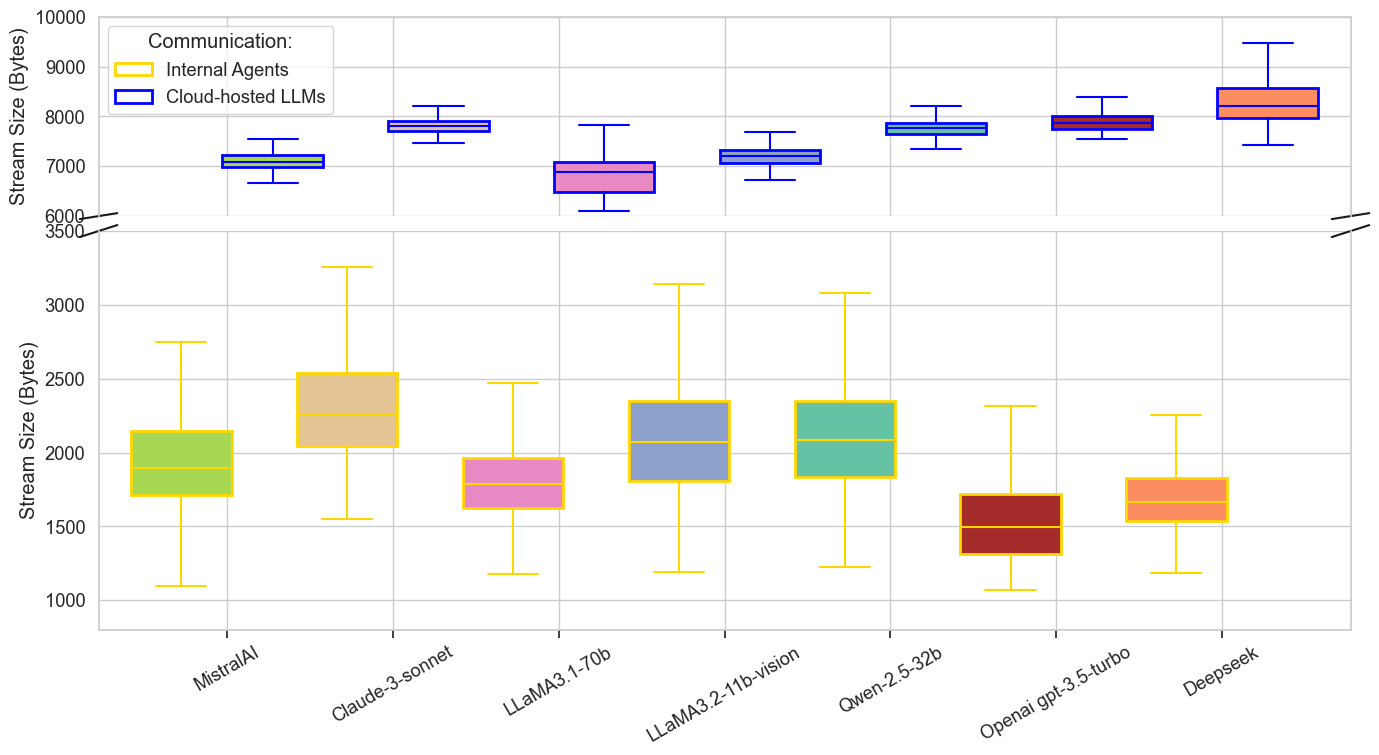

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.patches as mpatches  # 

# Style
sns.set(style="whitegrid", font_scale=1.2)

# Plot order and color palette
desired_order = [
    "MistralAI",
    "Claude-3-sonnet",
    "LLaMA3.1-70b",
    "LLaMA3.2-11b-vision",
    "Qwen-2.5-32b",
    "Openai gpt-3.5-turbo",
    "Deepseek"
]

model_palette = {
    "Qwen-2.5-32b": "#66c2a5",
    "Deepseek": "#fc8d62",
    "LLaMA3.2-11b-vision": "#8da0cb",
    "LLaMA3.1-70b": "#e78ac3",
    "MistralAI": "#a6d854",
    "Openai gpt-3.5-turbo": "brown",
    "Claude-3-sonnet": "#e5c494"
}

# File paths (relative)

localhost_paths = {
    "Qwen-2.5-32b": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_groq_v3_qwen.csv",
    "Deepseek": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_deepseek_R1.csv",
    "LLaMA3.2-11b-vision": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_llama2.csv",
    "LLaMA3.1-70b": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_llama31_v2.csv",
    "MistralAI": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_mistral.csv",
    "Openai gpt-3.5-turbo": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_openai_v2.csv",
    "Claude-3-sonnet": "packet_capture/statistics_stream_sizes_sorted_localhost_1000q_claude.csv"
}

wifi_paths = {
    "Qwen-2.5-32b": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_groq_v3_qwen.csv",
    "LLaMA3.2-11b-vision": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_llama2.csv",
    "LLaMA3.1-70b": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_llama31_v2.csv",
    "MistralAI": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_mistral.csv",
    "Openai gpt-3.5-turbo": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_openai_v2.csv",
    "Claude-3-sonnet": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_claude.csv",
    "Deepseek": "packet_capture/statistics_stream_sizes_sorted_wifi_1000q_deepseek_R1.csv"
}

# Load function
def load_data(paths, label):
    frames = []
    for model, path in paths.items():
        if os.path.exists(path):
            df = pd.read_csv(path)
            df['Model'] = model
            df['Source'] = label
            frames.append(df[['Model', 'stream_size', 'Source']])
        else:
            print(f"Missing file for {label.upper()} - {model}: {path}")
    return pd.concat(frames, ignore_index=True) if frames else pd.DataFrame()

# Load
localhost_df = load_data(localhost_paths, "Internal Agents")
wifi_df = load_data(wifi_paths, "Cloud-hosted LLMs")
combined_df = pd.concat([localhost_df, wifi_df], ignore_index=True)


# Set positions for boxplots
box_width = 0.55
positions = {model: i for i, model in enumerate(desired_order)}

# Create two y-axis plots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 8), gridspec_kw={'height_ratios': [1, 2]})

# Adjust gaps
upper_ylim = (6000, 10000)
lower_ylim = (800, 3500)

for ax in [ax1, ax2]:
    for model in desired_order:
        for idx, source in enumerate(["Internal Agents", "Cloud-hosted LLMs"]):
            subset = combined_df[(combined_df['Model'] == model) & (combined_df['Source'] == source)]
            if subset.empty:
                continue
            position = positions[model] + (idx - 0.5) * box_width
            box = ax.boxplot(
                subset["stream_size"],
                positions=[position],
                widths=box_width * 1.1,
                patch_artist=True,
                showfliers=False
            )
            face_color = model_palette[model]
            edge_color = 'gold' if source == 'Internal Agents' else 'blue'
            for patch in box['boxes']:
                patch.set_facecolor(face_color)
                patch.set_edgecolor(edge_color)
                patch.set_linewidth(2)
            for element in ['medians', 'whiskers', 'caps']:
                for line in box[element]:
                    line.set_color(edge_color)
                    line.set_linewidth(1.5)

# Apply limits
ax1.set_ylim(*upper_ylim)
ax2.set_ylim(*lower_ylim)

# Hide spines between axes
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Diagonal lines for break
d = .015  # break line size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# X-ticks and labels
ax2.set_xticks([positions[m] for m in desired_order])
ax2.set_xticklabels(desired_order, rotation=30)

# Y-labels and title
ax1.set_ylabel("Stream Size (Bytes)")
ax2.set_ylabel("Stream Size (Bytes)")
fig.suptitle("", fontsize=15)

# Custom legend
legend_patches = [
    mpatches.Patch(edgecolor='gold', facecolor='white', label='Internal Agents', linewidth=2),
    mpatches.Patch(edgecolor='blue', facecolor='white', label='Cloud-hosted LLMs', linewidth=2)
]
ax1.legend(handles=legend_patches, title="Communication:", loc="upper left")

plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
plt.savefig("your_filename.svg", format="svg")  # or "pdf" / "eps"

plt.show()

